<a href="https://colab.research.google.com/github/niczavadskiy/StrokePredicte/blob/main/EDAStroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Созданим и обучим нейронную сеть предсказывающую инсульт у пацента. На вход нейронов будут подаваться  входной вектор из параметров состояния пацента, на выходе решая задачу бинарной классификацию получим один из двух ответов. Инсульт ожидается или нет.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/niczavadskiy/StrokePredicte/main/healthcare-dataset-stroke-data-2.csv")

Загрузим Датасет с данными о пациентах

Информация об атрибуте: 1) id: уникальный идентификатор 2) gender: "Мужчина", "Женщина" или "Другой" 3) age: возраст пациента 4) hypertension: 0, если у пациента нет гипертонии, 1, если у пациента есть гипертония 5) heart_disease: 0, если у пациента нет есть какие-либо сердечные заболевания, 1 если у пациента есть сердечное заболевание 6) ever_married состоял в браке: "Нет" или "Да" 7) work_type: "дети", "Правительство", "Никогда не работал", "Частный" или "Самозанятый" 8) Residence_type: "Сельский" или "городской" 9) avg_glucose_level: средний уровень глюкозы в крови 10) bmi: индекс массы тела 11) smoking_status: "ранее курил", "никогда не курил", "курит" или "Неизвестно"* 12) stroke: 1, если у пациента был инсульт, или 0, если нет

In [ ]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
df.shape

(7102, 12)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7102 entries, 0 to 7101
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7102 non-null   int64  
 1   gender             7102 non-null   object 
 2   age                7102 non-null   float64
 3   hypertension       7102 non-null   int64  
 4   heart_disease      7102 non-null   int64  
 5   ever_married       7102 non-null   object 
 6   work_type          7102 non-null   object 
 7   Residence_type     7102 non-null   object 
 8   avg_glucose_level  7102 non-null   float64
 9   bmi                6581 non-null   float64
 10  smoking_status     7102 non-null   object 
 11  stroke             7102 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 665.9+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,7102.000000,7102.000000,7102.000000,7102.000000,7102.000000,6581.000000,7102.000000
mean,36685.345536,50.098924,0.144466,0.091805,113.551640,29.294165,0.315545
std,21387.219669,23.115377,0.351587,0.288771,51.838906,7.524283,0.464765
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17497.750000,33.000000,0.000000,0.000000,77.820000,24.200000,0.000000
50%,36841.000000,54.000000,0.000000,0.000000,94.245000,28.400000,0.000000
75%,55347.500000,70.000000,0.000000,0.000000,126.335000,33.200000,1.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,7102,7102,7102,7102,7102
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,4122,5113,4117,3676,2612


In [ ]:
X = df.drop(['id'], axis=1)


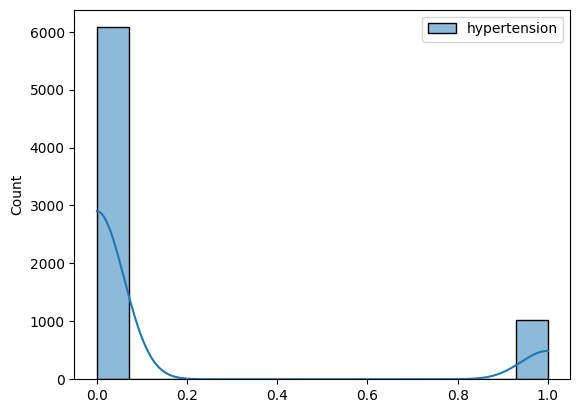

In [ ]:
sns.histplot(df[['hypertension']], kde=True)
plt.show()

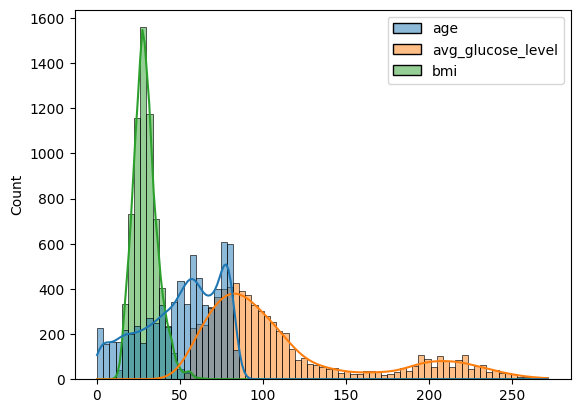

In [ ]:
sns.histplot(df[['age','avg_glucose_level','bmi']], kde=True)
plt.show()

Присвоить средние значение bmi тем записям у которых отсутствует данные по bmi

In [ ]:
mean = df['bmi'].mean()

df['bmi'].fillna(mean, inplace=True)

<Axes: >

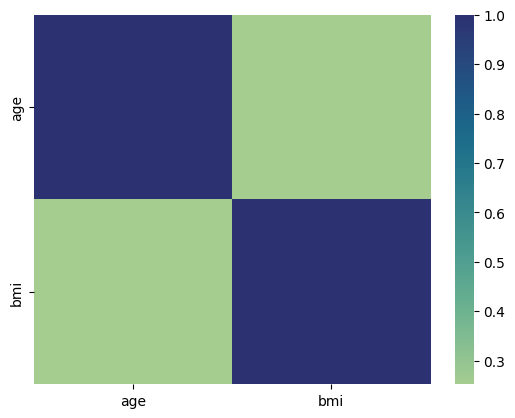

In [ ]:
corr = df[['age', 'bmi']].corr()

sns.heatmap(corr, cmap="crest")

<Axes: >

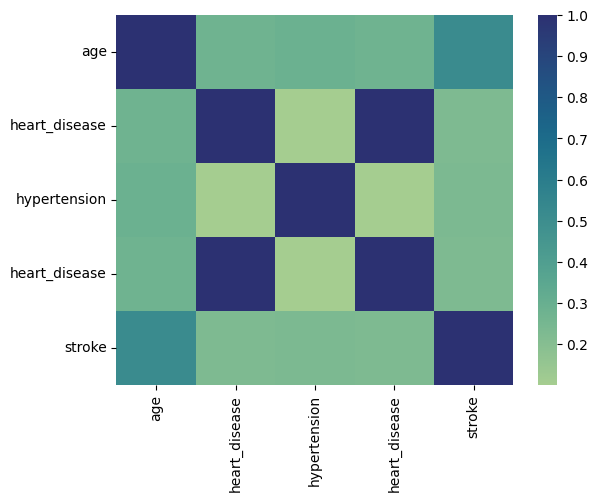

In [ ]:
corr = df[['age', 'heart_disease','hypertension','heart_disease','stroke']].corr()

sns.heatmap(corr, cmap="crest")


In [ ]:
df['gender'].value_counts(dropna=False)

Female    4122
Male      2979
Other        1
Name: gender, dtype: int64

In [ ]:
df = df[df.gender != 'Other']
df['gender'].value_counts(dropna=False)

Female    4122
Male      2979
Name: gender, dtype: int64

Исключим 1 Other пол, т.к. данных по Other недостаточно для  выделения него отдельного признака

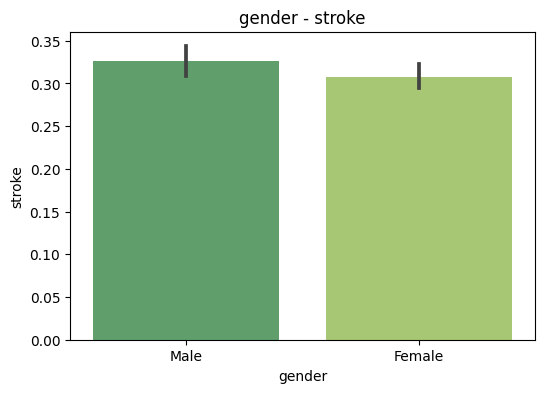

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='gender', y='stroke', data = df, palette='summer', errorbar='ci')
plt.title('gender - stroke')
plt.show()

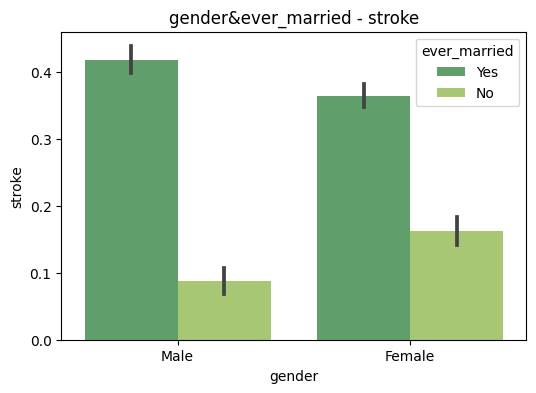

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='gender', y='stroke', hue='ever_married', data = df, palette='summer')
plt.title('gender&ever_married - stroke')
plt.show()

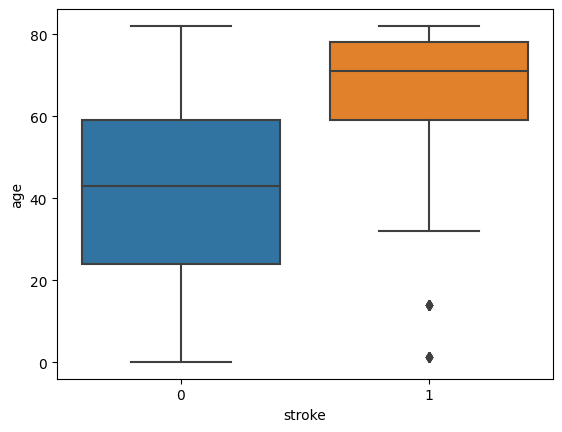

In [ ]:
sns.boxplot(x="stroke", y="age", data=df)
plt.show()

In [ ]:
len(df[df['stroke'] == 0]) / len(df)

0.6844106463878327

Исключим id и выполним маппинг по признакам с типом object

In [ ]:
X = df.drop([	'id','stroke'], axis=1)
y = df['stroke']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)

X_train.shape, X_test.shape

((6035, 10), (1066, 10))

In [ ]:
X['gender'] = X['gender'].map({'Male' : 1, 'Female' : 0})
X['ever_married'] = X['ever_married'].map({'Yes' : 1, 'No' : 0})
X['Residence_type'] = X['Residence_type'].map({'Urban' : 1, 'Rural' : 0})

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked
1,0,61.0,0,0,1,Self-employed,0,202.21,29.294165,never smoked
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked


In [ ]:

X_train.shape, X_test.shape
X_train.info()
X_train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6035 entries, 504 to 5809
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             6035 non-null   object 
 1   age                6035 non-null   float64
 2   hypertension       6035 non-null   int64  
 3   heart_disease      6035 non-null   int64  
 4   ever_married       6035 non-null   object 
 5   work_type          6035 non-null   object 
 6   Residence_type     6035 non-null   object 
 7   avg_glucose_level  6035 non-null   float64
 8   bmi                6035 non-null   float64
 9   smoking_status     6035 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 518.6+ KB


,age,hypertension,heart_disease,avg_glucose_level,bmi
count,6035.000000,6035.000000,6035.000000,6035.000000,6035.000000
mean,50.350370,0.145319,0.094449,113.404515,29.323465
std,23.065756,0.352451,0.292477,51.605275,7.257973
min,0.080000,0.000000,0.000000,55.220000,10.300000
25%,34.000000,0.000000,0.000000,77.820000,24.700000
50%,54.000000,0.000000,0.000000,94.150000,29.100000
75%,70.000000,0.000000,0.000000,125.890000,32.700000
max,82.000000,1.000000,1.000000,271.740000,97.600000


Выполним кодирование категориальных признаков 'work_type',	'smoking_status' методом One Hot Encoding, нормализуем размерность и название признаков в датасете

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

categorical = ['gender','Residence_type','ever_married','work_type',	'smoking_status']
numeric_features = [col for col in X_train.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [ ]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=lst)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=lst)

X_train_transformed.head()

,gender_Male,Residence_type_Urban,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.902344,1.0,1.0,0.068677,0.195876
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.365234,0.0,0.0,0.016950,0.180985
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.023438,0.0,0.0,0.118973,0.109966
3,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.951172,0.0,0.0,0.675965,0.232532
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.816895,0.0,1.0,0.801173,0.301260


In [ ]:
X_test_transformed.info()
X_test_transformed.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender_Male                     1066 non-null   float64
 1   Residence_type_Urban            1066 non-null   float64
 2   ever_married_Yes                1066 non-null   float64
 3   work_type_Never_worked          1066 non-null   float64
 4   work_type_Private               1066 non-null   float64
 5   work_type_Self-employed         1066 non-null   float64
 6   work_type_children              1066 non-null   float64
 7   smoking_status_formerly smoked  1066 non-null   float64
 8   smoking_status_never smoked     1066 non-null   float64
 9   smoking_status_smokes           1066 non-null   float64
 10  age                             1066 non-null   float64
 11  hypertension                    1066 non-null   float64
 12  heart_disease                   10

,gender_Male,Residence_type_Urban,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,0.417448,0.494371,0.700750,0.002814,0.562852,0.195122,0.107880,0.196998,0.365854,0.152908,0.593482,0.139775,0.076923,0.273123,0.215747
std,0.493370,0.500203,0.458144,0.053000,0.496267,0.396481,0.310374,0.397918,0.481895,0.360068,0.285091,0.346916,0.266594,0.245592,0.082007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000462,0.033219
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377441,0.000000,0.000000,0.103916,0.161512
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.633789,0.000000,0.000000,0.181438,0.211913
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.841309,0.000000,0.000000,0.332614,0.257732
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.540664


In [ ]:
X_train_transformed.info()
X_train_transformed.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   work_type_Never_worked          5680 non-null   float64
 1   work_type_Private               5680 non-null   float64
 2   work_type_Self-employed         5680 non-null   float64
 3   work_type_children              5680 non-null   float64
 4   smoking_status_formerly smoked  5680 non-null   float64
 5   smoking_status_never smoked     5680 non-null   float64
 6   smoking_status_smokes           5680 non-null   float64
 7   gender                          5680 non-null   float64
 8   age                             5680 non-null   float64
 9   hypertension                    5680 non-null   float64
 10  heart_disease                   5680 non-null   float64
 11  ever_married                    5680 non-null   float64
 12  Residence_type                  56

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
count,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000
mean,0.003169,0.576937,0.191197,0.097359,0.205634,0.368486,0.157042,0.416549,0.612410,0.146479,0.093486,0.720070,0.519894,0.270642,0.221312
std,0.056210,0.494089,0.393279,0.296472,0.404200,0.482437,0.363873,0.493030,0.281163,0.353617,0.291138,0.449004,0.499648,0.240633,0.089170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.401855,0.000000,0.000000,0.000000,0.000000,0.105346,0.165217
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658203,0.000000,0.000000,1.000000,1.000000,0.180039,0.218634
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.853516,0.000000,0.000000,1.000000,1.000000,0.331675,0.263354
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_transformed, y_train)

pred = model.predict_proba(X_test_transformed)[:,1]

In [ ]:
pred[:10]

array([0.44773589, 0.12327284, 0.72608082, 0.67186973, 0.06235934,
       0.12491547, 0.28391346, 0.45430617, 0.3077529 , 0.03832394])

In [ ]:
probs = model.predict_proba(X_test_transformed)

probs[:5]
probs[:,1][:5] # только вероятности инсульта

array([0.44773589, 0.12327284, 0.72608082, 0.67186973, 0.06235934])

In [ ]:
classes = probs[:,1] > 0.4

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[606, 136],
        [ 94, 230]]),
 0.7098765432098766)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, classes)


0.7842401500938087

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, classes)

0.6284153005464481

In [ ]:
model.coef_

array([[-0.06485527,  0.12492564, -0.08879167, -0.21125038,  0.19582237,
        -0.01091285,  0.84790721,  0.10246845, -0.25304995,  0.14742945,
         6.00843062,  0.44622745,  0.32810158,  0.92171644,  0.48569667]])

In [ ]:
classes = pred > 0.4

confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[2106,  350],
        [ 409,  686]]),
 0.6264840182648402)

In [ ]:
importances = pd.DataFrame({'weights': model.coef_[0], 'features': X_train_transformed.columns}).sort_values(by='weights')
importances

,weights,features
8,-0.253050,smoking_status_never smoked
3,-0.211250,work_type_Never_worked
2,-0.088792,ever_married_Yes
0,-0.064855,gender_Male
5,-0.010913,work_type_Self-employed
7,0.102468,smoking_status_formerly smoked
1,0.124926,Residence_type_Urban
9,0.147429,smoking_status_smokes
4,0.195822,work_type_Private
12,0.328102,heart_disease


In [183]:
import pickle

with open('model.pickle', 'wb') as c:
    pickle.dump(model, c)

#а так модель можно загрузить из файла:
with open('model.pickle', 'rb') as d:
    model = pickle.load(d)

In [190]:
from google.colab import files
files.download('model.pickle')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>